In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_url = "http://lib.stat.cmu.edu/datasets/boston"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [2]:
boston = data

In [3]:
df=pd.DataFrame(boston)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.columns = column_names

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df['PRICE'] = target

In [8]:
x= df.drop(['PRICE'], axis = 1)

In [9]:
y= df['PRICE']

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)


In [13]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [14]:
df = pd.DataFrame(ytrain_pred, ytrain)
df = pd.DataFrame(ytest_pred,ytest)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

33.44897999767639


In [16]:
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

19.326470203585725


In [17]:
mse = mean_squared_error(ytest,ytest_pred)
print(mse)

33.44897999767639


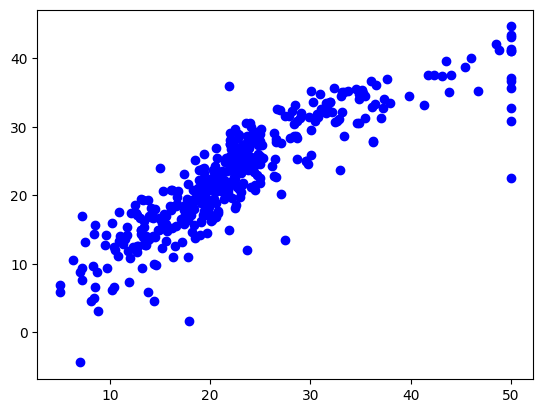

In [18]:
plt.scatter(ytrain, ytrain_pred , c='blue', marker='o', label='Training data')

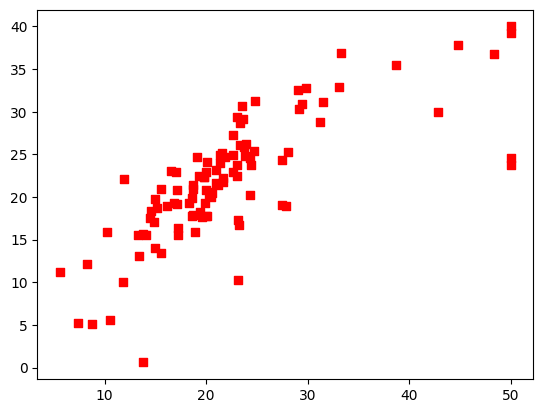

In [19]:
plt.scatter(ytest, ytest_pred , c='red', marker='s', label='Test data')

Text(0.5, 0, 'True Values')

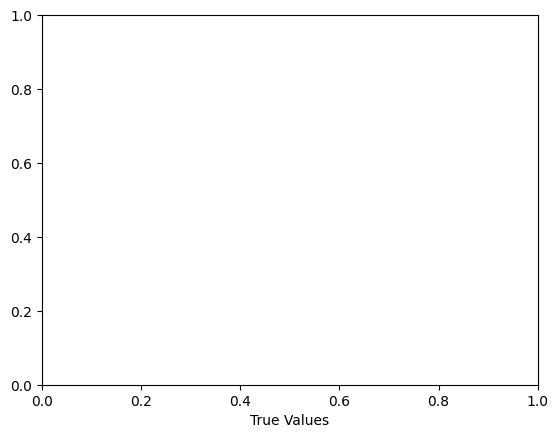

In [20]:
plt.xlabel('True Values')

In [21]:
xtrain.shape

(404, 13)